#Importing the Dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Data Processing

In [2]:
car_data = pd.read_csv("/content/car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape


(301, 9)

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
print(car_data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
#Encoding the categorical data

car_data.replace({"Fuel_Type" : {"Petrol" : 0, "Diesel" : 1, "CNG" : 2}}, inplace = True)

car_data.replace({"Seller_Type" : {"Dealer" : 0, "Individual" : 1}}, inplace = True)

car_data.replace({"Transmission" : {"Automatic" : 0, "Manual" : 1}}, inplace = True)

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


#Training The Model

In [15]:
#Separating labels and features
X = car_data.drop(columns = ["Selling_Price", "Car_Name"], axis = 1)
Y = car_data["Selling_Price"]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                    random_state = 2)

In [17]:
model_1 = LinearRegression()

In [18]:
model_1.fit(X_train, Y_train)

LinearRegression()

In [25]:
model_2 = Lasso()

In [26]:
model_2.fit(X_train, Y_train)

Lasso()

#Model Evaluation

In [30]:
training_data_prediction1 = model_1.predict(X_train)
training_accuracy_r2 = metrics.r2_score(training_data_prediction1, Y_train)
print("R2 Error: ", training_accuracy_r2)

R2 Error:  0.8685439505823429


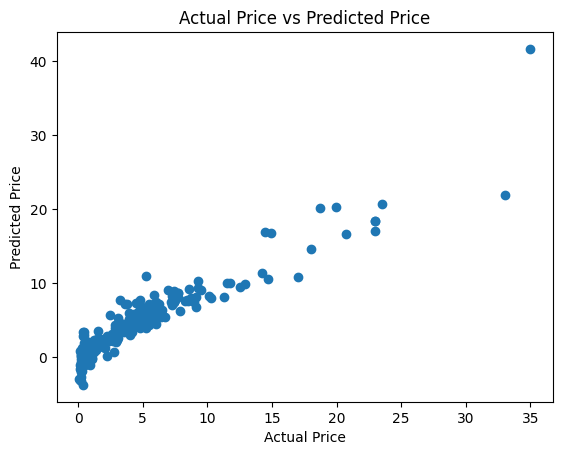

In [31]:
#Visualize the actual prices vs the predicted prices

plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [32]:
testing_data_prediction1 = model_1.predict(X_test)
testing_accuracy_r2 = metrics.r2_score(testing_data_prediction1, Y_test)
print("R2 Error: ", testing_accuracy_r2)

R2 Error:  0.8193296211105914


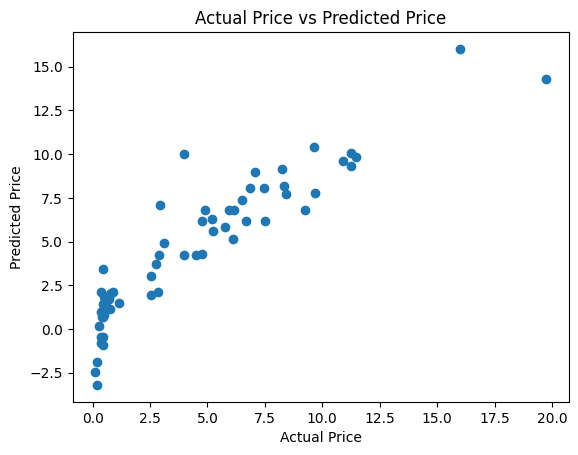

In [33]:
plt.scatter(Y_test, testing_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [34]:
training_data_prediction2 = model_2.predict(X_train)
training_accuracy_r2 = metrics.r2_score(training_data_prediction2, Y_train)
print("R2 Error: ", training_accuracy_r2)

R2 Error:  0.7999397993548054


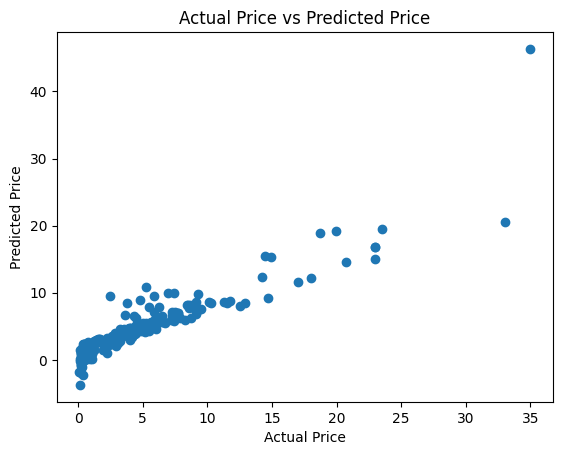

In [35]:
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [36]:
testing_data_prediction2 = model_2.predict(X_test)
testing_accuracy_r2 = metrics.r2_score(testing_data_prediction2, Y_test)
print("R2 Error: ", testing_accuracy_r2)

R2 Error:  0.7717678246278714


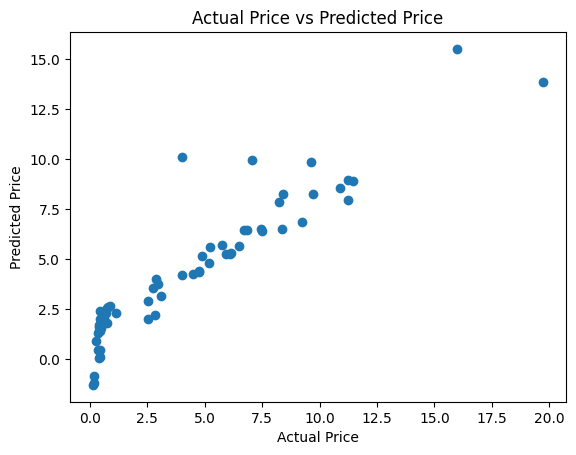

In [37]:
plt.scatter(Y_test, testing_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()